## name: Chunsheng Fang
## github name: chunshengFang
## usc id :5043794779

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import precision_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

#Load data and separate each column by whitespace
df=pd.read_csv("./data/vertebral_column_data/column_2C.dat",header=None,delim_whitespace=True)
df.columns=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius','grade_spondylolisthesis','Class']
df_NO=df.loc[df['Class'].str.match('NO')] #find the NO in the class column
df_NO.loc[:,'Class'] =0      
# use 0 to present the NO
df_AB=df.loc[df['Class'].str.match('AB')]
df_AB.loc[:,'Class'] =1
df_binary=pd.merge(df_NO, df_AB,how='outer')

C:\Users\Fcs10\AppData\Local\Temp\ipykernel_12276\3485559229.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NO.loc[:,'Class'] =0
C:\Users\Fcs10\AppData\Local\Temp\ipykernel_12276\3485559229.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB.loc[:,'Class'] =1


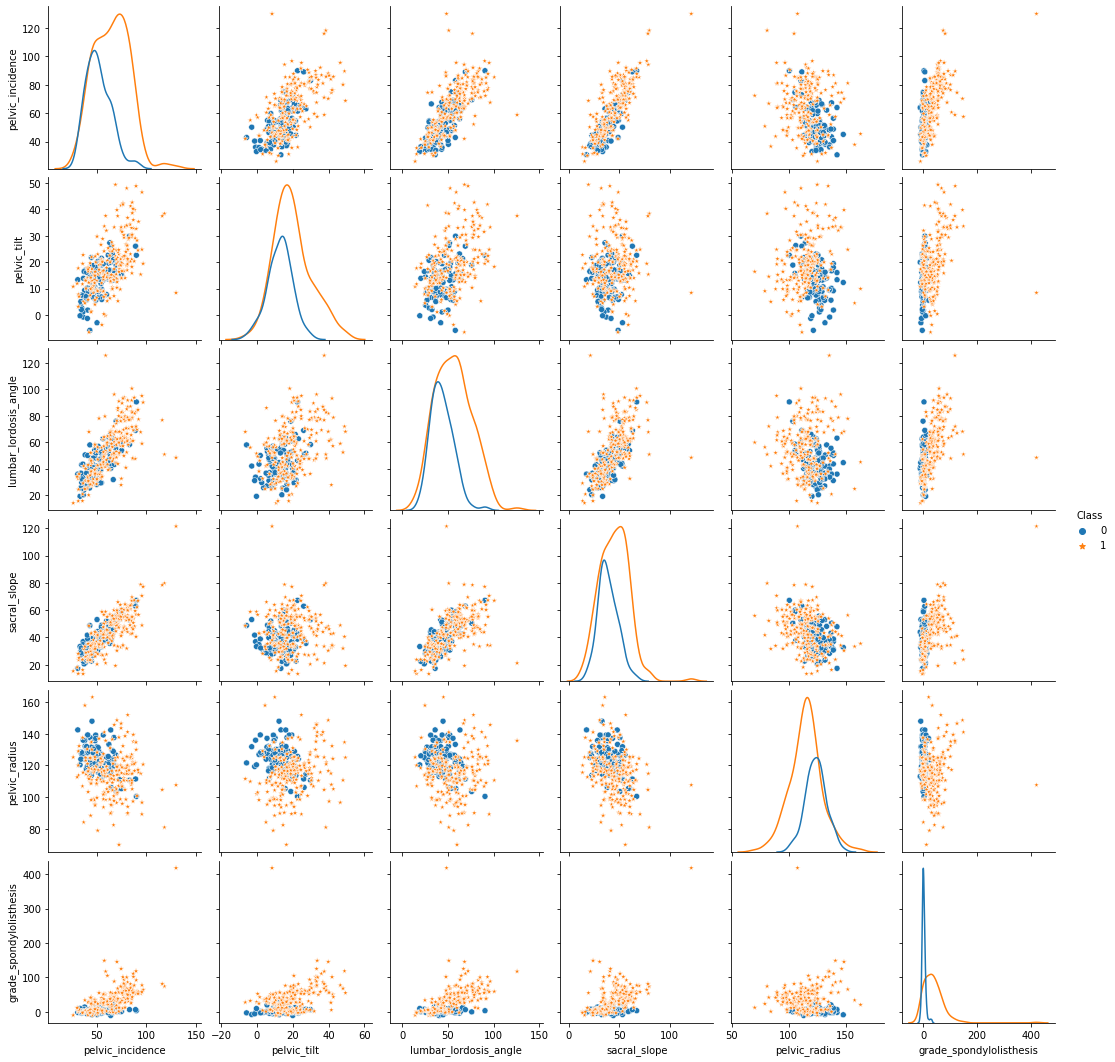

In [2]:
g=sns.pairplot(df_binary, hue='Class', markers=["o", "*"],kind='scatter',diag_kws={"shade": False})

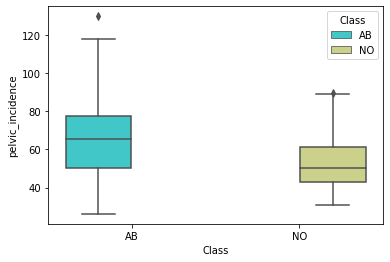

In [3]:
h=sns.boxplot(x="Class",y="pelvic_incidence",hue='Class',data=df, palette="rainbow")

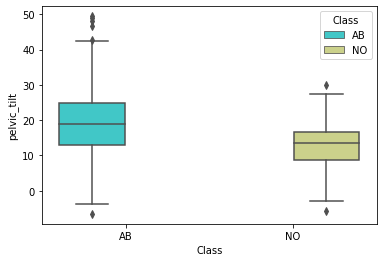

In [4]:
j=sns.boxplot(x="Class",y="pelvic_tilt",hue='Class',data=df, palette="rainbow")

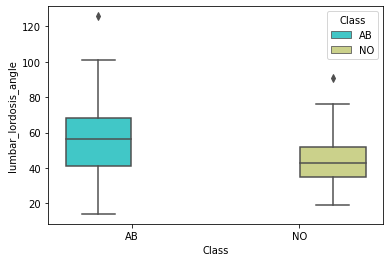

In [5]:
k=sns.boxplot(x="Class",y="lumbar_lordosis_angle",hue='Class',data=df, palette="rainbow")

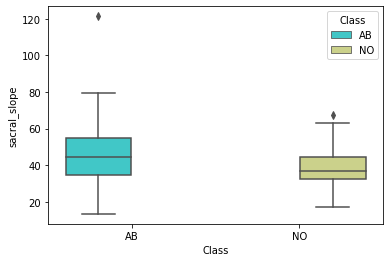

In [6]:
l=sns.boxplot(x="Class",y="sacral_slope",hue='Class',data=df, palette="rainbow")

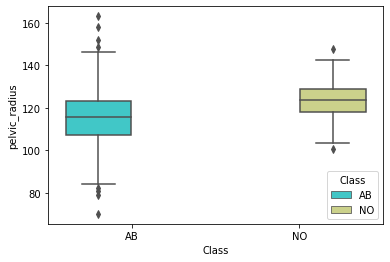

In [7]:
m=sns.boxplot(x="Class",y="pelvic_radius",hue='Class',data=df, palette="rainbow")

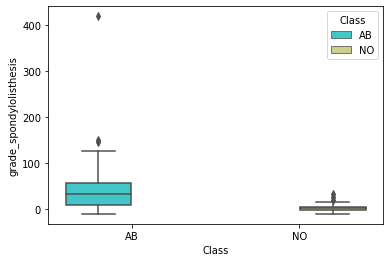

In [8]:
n=sns.boxplot(x="Class",y="grade_spondylolisthesis",hue='Class',data=df, palette="rainbow")

In [9]:
training_set=pd.merge(df_NO.iloc[0:70,:],df_AB.iloc[0:140,:],how='outer')
#selec training set 
Test_set=pd.merge(df_NO.iloc[70:,:],df_AB.iloc[140:,:],how='outer')#selec test set
X_T= training_set.iloc[:,:-1]
y_T = training_set.iloc[:,-1]
X_test=Test_set.iloc[:,:-1]
Y_test=Test_set.iloc[:,-1]
training_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_spondylolisthesis,Class
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
205,77.12,30.35,77.48,46.77,110.61,82.09,1
206,88.02,39.84,81.77,48.18,116.60,56.77,1
207,83.40,34.31,78.42,49.09,110.47,49.67,1
208,72.05,24.70,79.87,47.35,107.17,56.43,1


In [10]:
classifier=KNeighborsClassifier(n_neighbors=208,metric='euclidean')
Train_error=[]
alternative_k = np.arange(208, 0, -3) 
#choose the train and errors in terms of k belongs to {208,205,....,4,1}
for i in alternative_k:
    knn=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_T, y_T)
    pred_i = knn.predict(X_T)
    Train_error.append(np.mean(pred_i != y_T))
print("Minimum train error:",min(Train_error),"at K =",208-3*Train_error.index(min(Train_error)))
Test_error = []
for i in alternative_k:
    knn=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_T, y_T)
    pred_i = knn.predict(X_test)
    Test_error.append(np.mean(pred_i != Y_test))

Minimum train error: 0.0 at K = 1


Minimum test error: 0.06 at K = 4


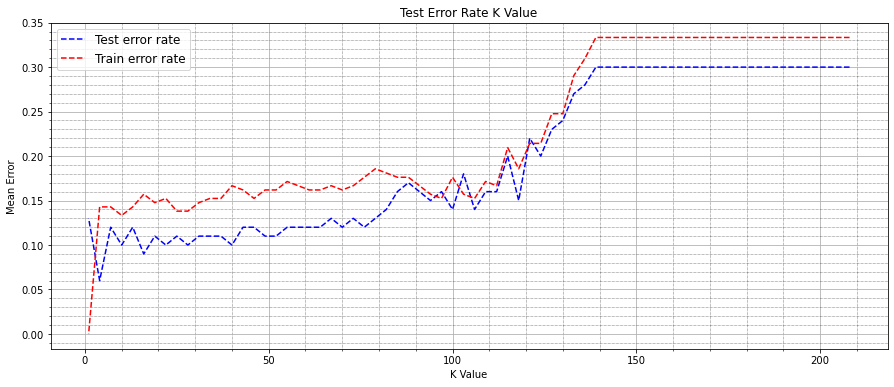

In [11]:
plt.figure(figsize=(15, 6))
plt.plot(alternative_k, Test_error, color='blue', linestyle='dashed',markerfacecolor='blue', markersize=10,label='Test error rate')
plt.plot(alternative_k, Train_error, color='red', linestyle='dashed',markerfacecolor='blue', markersize=10,label='Train error rate')
plt.title('Test Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid(True)
plt.minorticks_on()
plt.legend(prop={'size': 12})
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
print("Minimum test error:",min(Test_error),"at K =",208-3*Test_error.index(min(Test_error)))

In [12]:
knn = KNeighborsClassifier(n_neighbors = 4, metric = "euclidean")
knn.fit(X_T, y_T)
pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, pred)
average_precision = precision_score(Y_test, pred)
fscore = f1_score(Y_test, pred)
print("Confusion matrix is:\n",conf_matrix)
print('**Classification report is:**')
print(classification_report(Y_test, pred))
print("True Positive Rate - ", conf_matrix[1][1]/(conf_matrix[1][0] + conf_matrix[1][1]))
print("True Negative Rate - ", conf_matrix[0][0]/(conf_matrix[0][0] + conf_matrix[0][1]))
print("Precision : ", average_precision)
print("F1-Score at k=4 : ", fscore)


Confusion matrix is:
 [[25  5]
 [ 1 69]]
**Classification report is:**
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

True Positive Rate -  0.9857142857142858
True Negative Rate -  0.8333333333333334
Precision :  0.9324324324324325
F1-Score at k=4 :  0.9583333333333333


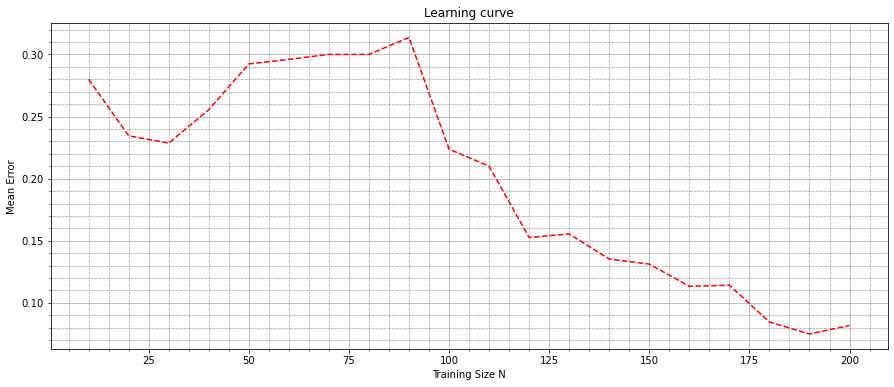

In [13]:
alternative_N = np.arange(10, 210, 10)
Train_K_min=[]
for N in alternative_N:
    training_N_set=pd.merge(df_NO.iloc[0:N//3,:],df_AB.iloc[0:N-N//3,:],how='outer') #selec training set
    Test_N_set= pd.merge(df_NO.iloc[N//3:,:],df_AB.iloc[N-N//3:,:],how='outer')
    alternative_N_k=np.arange(1,N,5)
    X_N_Train = training_N_set.iloc[:, :-1].values
    Y_N_Train = training_N_set.iloc[:, -1].values
    X_N_Test = Test_N_set.iloc[:, :-1].values
    Y_N_Test = Test_N_set.iloc[:, -1].values
    Train_N_error=[]
    for k in alternative_N_k:                                  
           classifier=KNeighborsClassifier \
           (n_neighbors=k,metric='euclidean')
           classifier.fit(X_N_Train, Y_N_Train)
           pred_i=classifier.predict(X_N_Test)
           Train_N_error.append(np.mean(pred_i != Y_N_Test))
    Train_K_min.append((min(Train_N_error)))
x=range(10,211,10)
plt.figure(figsize=(15, 6))
plt.plot(alternative_N, Train_K_min, color='red', linestyle='dashed',markerfacecolor='blue', markersize=10)
plt.title('Learning curve')
plt.xlabel('Training Size N')
plt.ylabel('Mean Error')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black') 

In [14]:
print("Metric : ", "Manhattan")
train_error_throughtout = []
k = np.arange(1,200,5)
test_error_array= {}
train_error_array = {}
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,p=1, metric = "minkowski")
    knn.fit(X_T, y_T)
    y_test_pred = knn.predict(X_test)
    test_error_array.update({i: 1 - accuracy_score(Y_test, y_test_pred)})
    y_train_pred = knn.predict(X_T)
    train_error_array.update({i: 1 - accuracy_score(y_T, y_train_pred)})
print("\ntest error array\n",test_error_array)
train_error_throughtout.append(min(train_error_array.values()))
optimal_k= [key for m in [min(test_error_array.values())] for key,val in test_error_array.items() if val == m][-1]
print("\nerror:",min(test_error_array.values()))
print("\noptimal_k:",optimal_k)


Metric :  Manhattan

test error array
 {1: 0.12, 6: 0.10999999999999999, 11: 0.10999999999999999, 16: 0.12, 21: 0.12, 26: 0.10999999999999999, 31: 0.12, 36: 0.13, 41: 0.13, 46: 0.13, 51: 0.14, 56: 0.13, 61: 0.15000000000000002, 66: 0.15000000000000002, 71: 0.14, 76: 0.14, 81: 0.16000000000000003, 86: 0.15000000000000002, 91: 0.19999999999999996, 96: 0.19999999999999996, 101: 0.21999999999999997, 106: 0.20999999999999996, 111: 0.22999999999999998, 116: 0.20999999999999996, 121: 0.21999999999999997, 126: 0.24, 131: 0.28, 136: 0.28, 141: 0.30000000000000004, 146: 0.30000000000000004, 151: 0.30000000000000004, 156: 0.30000000000000004, 161: 0.30000000000000004, 166: 0.30000000000000004, 171: 0.30000000000000004, 176: 0.30000000000000004, 181: 0.30000000000000004, 186: 0.30000000000000004, 191: 0.30000000000000004, 196: 0.30000000000000004}

error: 0.10999999999999999

optimal_k: 26


In [15]:
p_values = []
for i in range(1,11):
    p_values.append(10**(i/10))
print("\np_value\n",p_values)

test_error_array = {}
train_error_array = {}
for i in p_values:
    knn = KNeighborsClassifier(n_neighbors=optimal_k,p=i)
    knn.fit(X_T, y_T)
    y_test_pred = knn.predict(X_test)
    test_error_array.update({i: 1 - accuracy_score(Y_test, y_test_pred)})
    y_train_pred = knn.predict(X_T)
    train_error_array.update({i: 1 - accuracy_score(y_T, y_train_pred)})
print("\n test error array\n",test_error_array)

train_error_throughtout.append(min(train_error_array.values()))
optimal_p = [key for m in [min(test_error_array.values())] for key,val in test_error_array.items() if val == m]
print("\noptimal_p",optimal_p)
import math
best_p = [math.log10(x) for x in optimal_p]
print("\nbest p_value:",best_p)


p_value
 [1.2589254117941673, 1.5848931924611136, 1.9952623149688795, 2.51188643150958, 3.1622776601683795, 3.9810717055349722, 5.011872336272722, 6.309573444801933, 7.943282347242816, 10.0]

 test error array
 {1.2589254117941673: 0.09999999999999998, 1.5848931924611136: 0.09999999999999998, 1.9952623149688795: 0.10999999999999999, 2.51188643150958: 0.09999999999999998, 3.1622776601683795: 0.10999999999999999, 3.9810717055349722: 0.09999999999999998, 5.011872336272722: 0.10999999999999999, 6.309573444801933: 0.10999999999999999, 7.943282347242816: 0.10999999999999999, 10.0: 0.10999999999999999}

optimal_p [1.2589254117941673, 1.5848931924611136, 2.51188643150958, 3.9810717055349722]

best p_value: [0.10000000000000002, 0.20000000000000004, 0.4, 0.6]


In [16]:
k = np.arange(1,200,5)
test_error_array= {}
train_error_array= {}
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,metric='chebyshev')
    knn.fit(X_T, y_T)
    y_test_pred = knn.predict(X_test)
    test_error_array.update({i: 1 - accuracy_score(Y_test, y_test_pred)})
    y_train_pred = knn.predict(X_T)
    train_error_array.update({i: 1 - accuracy_score(y_T, y_train_pred)})
print("\n test error array\n",test_error_array)
train_error_throughtout.append(min(train_error_array.values()))

optimal_k = [key for m in [min(test_error_array.values())] for key,val in test_error_array.items() if val == m][0]
print("\noptimal_k:",optimal_k)




 test error array
 {1: 0.13, 6: 0.09999999999999998, 11: 0.12, 16: 0.07999999999999996, 21: 0.10999999999999999, 26: 0.12, 31: 0.12, 36: 0.09999999999999998, 41: 0.13, 46: 0.12, 51: 0.12, 56: 0.12, 61: 0.14, 66: 0.13, 71: 0.14, 76: 0.10999999999999999, 81: 0.14, 86: 0.12, 91: 0.15000000000000002, 96: 0.14, 101: 0.18999999999999995, 106: 0.18000000000000005, 111: 0.18000000000000005, 116: 0.18000000000000005, 121: 0.20999999999999996, 126: 0.20999999999999996, 131: 0.25, 136: 0.28, 141: 0.30000000000000004, 146: 0.30000000000000004, 151: 0.30000000000000004, 156: 0.30000000000000004, 161: 0.30000000000000004, 166: 0.30000000000000004, 171: 0.30000000000000004, 176: 0.30000000000000004, 181: 0.30000000000000004, 186: 0.30000000000000004, 191: 0.30000000000000004, 196: 0.30000000000000004}

optimal_k: 16


In [17]:
k = np.arange(1,200,5)
test_error_array = {}
train_error_array = {}
covarience_x = np.cov(X_T)  
covarience_x_inverse = np.linalg.inv(covarience_x)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute', 
                               metric='mahalanobis', 
                               metric_params={'VI': covarience_x_inverse})
    knn.fit(X_T, y_T)
    y_test_pred = knn.predict(X_test)
    test_error_array.update({i: 1 - accuracy_score(Y_test, y_test_pred)})
    y_train_pred = knn.predict(X_T)
    train_error_array.update({i: 1 - accuracy_score(y_T, y_train_pred)})
print("\n test error array\n",test_error_array)
train_error_throughtout.append(min(train_error_array.values()))
optimal_k = [key for m in [min(test_error_array.values())] for key,val in test_error_array.items() if val == m][0]
print("\noptimal_k:",optimal_k)


 test error array
 {1: 0.22999999999999998, 6: 0.25, 11: 0.20999999999999996, 16: 0.20999999999999996, 21: 0.21999999999999997, 26: 0.22999999999999998, 31: 0.24, 36: 0.24, 41: 0.25, 46: 0.26, 51: 0.27, 56: 0.30000000000000004, 61: 0.29000000000000004, 66: 0.27, 71: 0.29000000000000004, 76: 0.31999999999999995, 81: 0.32999999999999996, 86: 0.32999999999999996, 91: 0.32999999999999996, 96: 0.33999999999999997, 101: 0.33999999999999997, 106: 0.33999999999999997, 111: 0.32999999999999996, 116: 0.32999999999999996, 121: 0.32999999999999996, 126: 0.31999999999999995, 131: 0.31999999999999995, 136: 0.30000000000000004, 141: 0.30000000000000004, 146: 0.30000000000000004, 151: 0.30000000000000004, 156: 0.30000000000000004, 161: 0.30000000000000004, 166: 0.30000000000000004, 171: 0.30000000000000004, 176: 0.30000000000000004, 181: 0.30000000000000004, 186: 0.30000000000000004, 191: 0.30000000000000004, 196: 0.30000000000000004}

optimal_k: 11


In [18]:
k = np.arange(1,200,5)
test_error_array = {}
train_error_array = {}
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(X_T, y_T)
    y_test_pred = knn.predict(X_test)
    test_error_array.update({i: 1 - accuracy_score(Y_test, y_test_pred)})
    y_train_pred = knn.predict(X_T)
    train_error_array.update({i: 1 - accuracy_score(y_T, y_train_pred)})
print("\ntest error array\n",test_error_array)
train_error_throughtout.append(min(train_error_array.values()))
best_error = min(test_error_array.values())
print("\n Euclidean best error",best_error)


test error array
 {1: 0.13, 6: 0.09999999999999998, 11: 0.12, 16: 0.10999999999999999, 21: 0.10999999999999999, 26: 0.10999999999999999, 31: 0.10999999999999999, 36: 0.10999999999999999, 41: 0.10999999999999999, 46: 0.10999999999999999, 51: 0.10999999999999999, 56: 0.10999999999999999, 61: 0.10999999999999999, 66: 0.10999999999999999, 71: 0.10999999999999999, 76: 0.12, 81: 0.13, 86: 0.13, 91: 0.14, 96: 0.14, 101: 0.12, 106: 0.14, 111: 0.14, 116: 0.13, 121: 0.13, 126: 0.13, 131: 0.14, 136: 0.14, 141: 0.17000000000000004, 146: 0.18999999999999995, 151: 0.18999999999999995, 156: 0.19999999999999996, 161: 0.22999999999999998, 166: 0.25, 171: 0.27, 176: 0.27, 181: 0.27, 186: 0.27, 191: 0.28, 196: 0.28}

 Euclidean best error 0.09999999999999998


In [19]:
k = np.arange(1,200,5)
test_error_array = {}
train_error_array = {}
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance',p=1)
    knn.fit(X_T, y_T)
    y_test_pred = knn.predict(X_test)
    test_error_array.update({i: 1 - accuracy_score(Y_test, y_test_pred)})
    y_train_pred = knn.predict(X_T)
    train_error_array.update({i: 1 - accuracy_score(y_T, y_train_pred)})
print("\ntest error array\n",test_error_array)
train_error_throughtout.append(min(train_error_array.values()))
best_error = min(test_error_array.values())
print("\n Manhattan best error",best_error)


test error array
 {1: 0.12, 6: 0.10999999999999999, 11: 0.10999999999999999, 16: 0.12, 21: 0.10999999999999999, 26: 0.09999999999999998, 31: 0.10999999999999999, 36: 0.10999999999999999, 41: 0.10999999999999999, 46: 0.10999999999999999, 51: 0.12, 56: 0.12, 61: 0.13, 66: 0.13, 71: 0.10999999999999999, 76: 0.12, 81: 0.14, 86: 0.14, 91: 0.13, 96: 0.13, 101: 0.15000000000000002, 106: 0.15000000000000002, 111: 0.15000000000000002, 116: 0.15000000000000002, 121: 0.15000000000000002, 126: 0.15000000000000002, 131: 0.15000000000000002, 136: 0.16000000000000003, 141: 0.17000000000000004, 146: 0.18000000000000005, 151: 0.18999999999999995, 156: 0.20999999999999996, 161: 0.24, 166: 0.25, 171: 0.27, 176: 0.27, 181: 0.27, 186: 0.27, 191: 0.28, 196: 0.29000000000000004}

 Manhattan best error 0.09999999999999998


In [20]:
k = np.arange(1,200,5)
test_error_array = {}
train_error_array = {}
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,metric='chebyshev',weights='distance')
    knn.fit(X_T, y_T)
    y_test_pred = knn.predict(X_test)
    test_error_array.update({i: 1 - accuracy_score(Y_test, y_test_pred)})
    y_train_pred = knn.predict(X_T)
    train_error_array.update({i: 1 - accuracy_score(y_T, y_train_pred)})
print("\ntest error array\n",test_error_array)
train_error_throughtout.append(min(train_error_array.values()))
best_error = min(test_error_array.values())
print("\n  Chebyshev best error",best_error)



test error array
 {1: 0.13, 6: 0.13, 11: 0.12, 16: 0.10999999999999999, 21: 0.12, 26: 0.12, 31: 0.10999999999999999, 36: 0.10999999999999999, 41: 0.10999999999999999, 46: 0.12, 51: 0.12, 56: 0.12, 61: 0.10999999999999999, 66: 0.13, 71: 0.12, 76: 0.12, 81: 0.12, 86: 0.14, 91: 0.13, 96: 0.14, 101: 0.14, 106: 0.14, 111: 0.14, 116: 0.14, 121: 0.15000000000000002, 126: 0.14, 131: 0.16000000000000003, 136: 0.16000000000000003, 141: 0.18000000000000005, 146: 0.18999999999999995, 151: 0.20999999999999996, 156: 0.20999999999999996, 161: 0.22999999999999998, 166: 0.26, 171: 0.26, 176: 0.26, 181: 0.27, 186: 0.27, 191: 0.27, 196: 0.28}

  Chebyshev best error 0.10999999999999999


In [21]:
lt_error= min(train_error_throughtout)
print("\n\nlowest_train_error:",lt_error)



lowest_train_error: 0.0
